<a href="https://colab.research.google.com/github/saishshinde15/NLP/blob/main/Text_Classification_RNN(guided).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-04-13 06:41:40--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.08s   

2024-04-13 06:41:40 (59.1 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
df = pd.read_csv('bbc_text_cls.csv')

In [4]:
df['targets'] = df['labels'].astype("category").cat.codes

In [5]:
# number of classes
K = df['targets'].max() + 1
K

5

In [6]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [7]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

In [8]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 27923 unique tokens.


In [9]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (1557, 3505)


In [10]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (668, 3505)


In [11]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [12]:
# Exercise: try other models
# 1) multiple LSTM layers
# 2) GRU instead of LSTM
# 3) SimpleRNN instead of LSTM
# 4) return_sequences=False, and no maxpool
# 5) For 1-4, try different values of number of hidden units
# 6) Combinations of the above


In [14]:
# Compile and fit
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  df_train['targets'],
  epochs=5,#50
  validation_data=(data_test, df_test['targets'])
)

Training model...
Epoch 1/5
49/49 [==============================] - 166s 3s/step - loss: 1.5903 - accuracy: 0.3667 - val_loss: 1.5685 - val_accuracy: 0.4326
Epoch 2/5
49/49 [==============================] - 161s 3s/step - loss: 1.5245 - accuracy: 0.4194 - val_loss: 1.4419 - val_accuracy: 0.4656
Epoch 3/5
49/49 [==============================] - 161s 3s/step - loss: 1.2415 - accuracy: 0.5389 - val_loss: 1.1524 - val_accuracy: 0.6452
Epoch 4/5
49/49 [==============================] - 161s 3s/step - loss: 1.0159 - accuracy: 0.6448 - val_loss: 1.0155 - val_accuracy: 0.6482
Epoch 5/5
49/49 [==============================] - 160s 3s/step - loss: 1.2314 - accuracy: 0.5260 - val_loss: 1.4287 - val_accuracy: 0.3518


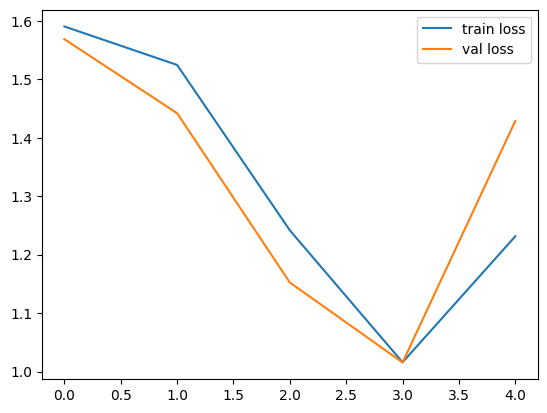

In [15]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

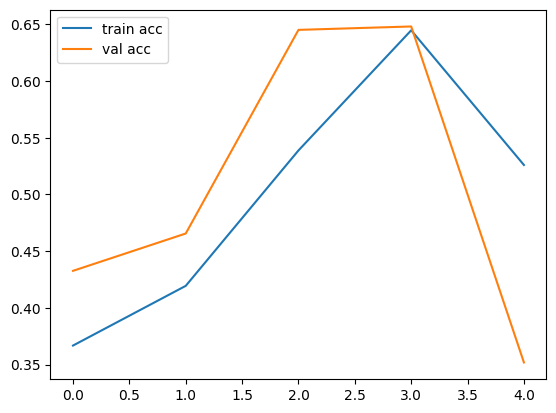

In [16]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();